In [1]:
!pip install --q anndata
!pip install --q decoupler
!pip install --q scanpy
!pip install --q igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.6/122.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 17.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.2 which is incompatible.
dask-cuda 25.2.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.2 which is incompatible.
distributed-ucxx-cu12 0.42.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.2 which is incompatible.
cuml-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.2 which is incompatible.
   ━━━━━━━━━━━━━━━━

In [2]:
import scanpy as sc
import decoupler as dc
import numpy as np

# Plotting options, change to your liking
sc.settings.set_figure_params(dpi=300, frameon=False)
sc.set_figure_params(dpi=300)
sc.set_figure_params(figsize=(4, 4))

In [3]:
adata = sc.datasets.pbmc3k_processed()
adata

  0%|          | 0.00/23.5M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

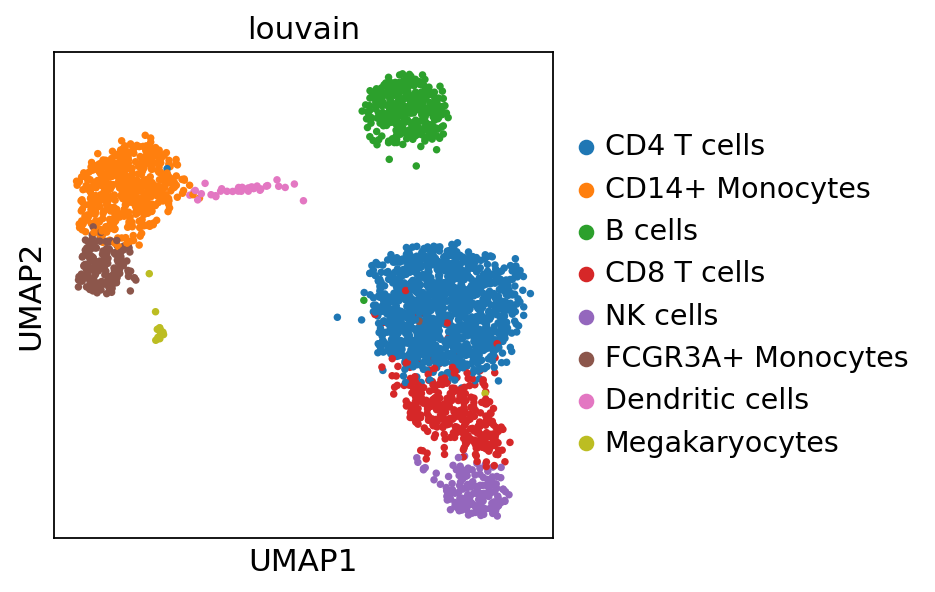

In [4]:
sc.pl.umap(adata, color='louvain')


In [5]:
progeny = dc.get_progeny(organism='human', top=500)
progeny

source   target     weight   p_value
0     Androgen  TMPRSS2  11.490631       0.0
1     Androgen   NKX3-1  10.622551       0.0
2     Androgen   MBOAT2  10.472733       0.0
3     Androgen     KLK2  10.176186       0.0
4     Androgen     SARG  11.386852       0.0
...        ...      ...        ...       ...
6995       p53    ZMYM4  -2.325752  0.000002
6996       p53    CFDP1  -1.628168  0.000002
6997       p53   VPS37D   2.309503  0.000002
6998       p53    TEDC1  -2.274823  0.000002
6999       p53  CCDC138  -3.205113  0.000002

[7000 rows x 4 columns]

In [6]:
dc.run_mlm(
    mat=adata,
    net=progeny,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)

1 features of mat are empty, they will be removed.
Running mlm on mat with 2638 samples and 13713 targets for 14 sources.


  0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr', 'mlm_estimate', 'mlm_pvals'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [8]:
adata.obsm['mlm_estimate']

Androgen      EGFR  Estrogen   Hypoxia  JAK-STAT      MAPK  \
AAACATACAACCAC-1  0.490808  3.429084 -1.039441  1.021548 -0.191042 -2.449631   
AAACATTGAGCTAC-1 -0.466201  2.585617 -1.352572  1.552106  1.692950 -3.814194   
AAACATTGATCAGC-1  0.201594  2.639025 -1.293040  1.610743  1.638280 -2.549840   
AAACCGTGCTTCCG-1 -1.383697  3.073606 -0.274373  0.965906  7.269398 -3.850540   
AAACCGTGTATGCG-1  0.066506  2.647741 -0.498160  0.943160  3.156663 -0.177606   
...                    ...       ...       ...       ...       ...       ...   
TTTCGAACTCTCAT-1 -1.039859  3.378976 -0.377933  2.363055  8.334863 -3.247122   
TTTCTACTGAGGCA-1  1.770347  1.534038 -0.031625  0.196968  3.509904 -3.166852   
TTTCTACTTCCTCG-1  0.953096  2.150570 -1.543162  0.925298  1.705992 -2.324975   
TTTGCATGAGAGGC-1 -0.716611  2.011698 -0.350684  0.933492  0.839202 -1.235624   
TTTGCATGCCTCAC-1 -0.305447  1.214574  0.366969  1.410469  2.162072 -1.455477   

                      NFkB      PI3K      TGFb      TNFa     Trail      VEGF  \
AAACATACAACCAC-1 -0.320055 -0.916049 -0.124889  2.243871 -0.675080 -1.272345   
AAACATTGAGCTAC-1 -1.674760  0.388031 -1.621433  2.277024  0.742877 -1.315730   
AAACATTGATCAGC-1 -1.316796 -0.295223 -0.578436  3.047308 -0.326156 -1.112296   
AAACCGTGCTTCCG-1 -3.170332 -2.129100 -0.257945  3.647277  0.726435 -1.122516   
AAACCGTGTATGCG-1  0.081432 -1.506025  0.177543  0.740944  0.213525 -0.016440   
...                    ...       ...       ...       ...       ...       ...   
TTTCGAACTCTCAT-1 -2.990553  0.047851  0.215981  3.591358  0.035672 -1.774677   
TTTCTACTGAGGCA-1 -1.301823  1.392412 -1.793369  1.649786 -2.002095 -0.923002   
TTTCTACTTCCTCG-1 -0.933975 -1.584640  0.437550  1.805771  1.886833 -1.383963   
TTTGCATGAGAGGC-1 -1.230405 -0.841038 -0.187701  1.326481  1.442047 -2.402500   
TTTGCATGCCTCAC-1 -1.813302 -1.840132 -0.517397  2.758604 -1.074997 -1.265815   

                       WNT       p53  
AAACATACAACCAC-1  1.705514 -5.722437  
AAACATTGAGCTAC-1  0.881297 -6.952016  
AAACATTGATCAGC-1  0.324729 -3.138162  
AAACCGTGCTTCCG-1  1.512027 -3.092223  
AAACCGTGTATGCG-1  0.074150 -0.240803  
...                    ...       ...  
TTTCGAACTCTCAT-1  1.227447 -1.182745  
TTTCTACTGAGGCA-1  1.033537 -2.035009  
TTTCTACTTCCTCG-1  0.689706 -5.863474  
TTTGCATGAGAGGC-1  1.367672  0.374511  
TTTGCATGCCTCAC-1  1.441138 -2.021980  

[2638 rows x 14 columns]

In [9]:
acts = dc.get_acts(adata, obsm_key='mlm_estimate')
acts

AnnData object with n_obs × n_vars = 2638 × 14
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr', 'mlm_estimate', 'mlm_pvals'

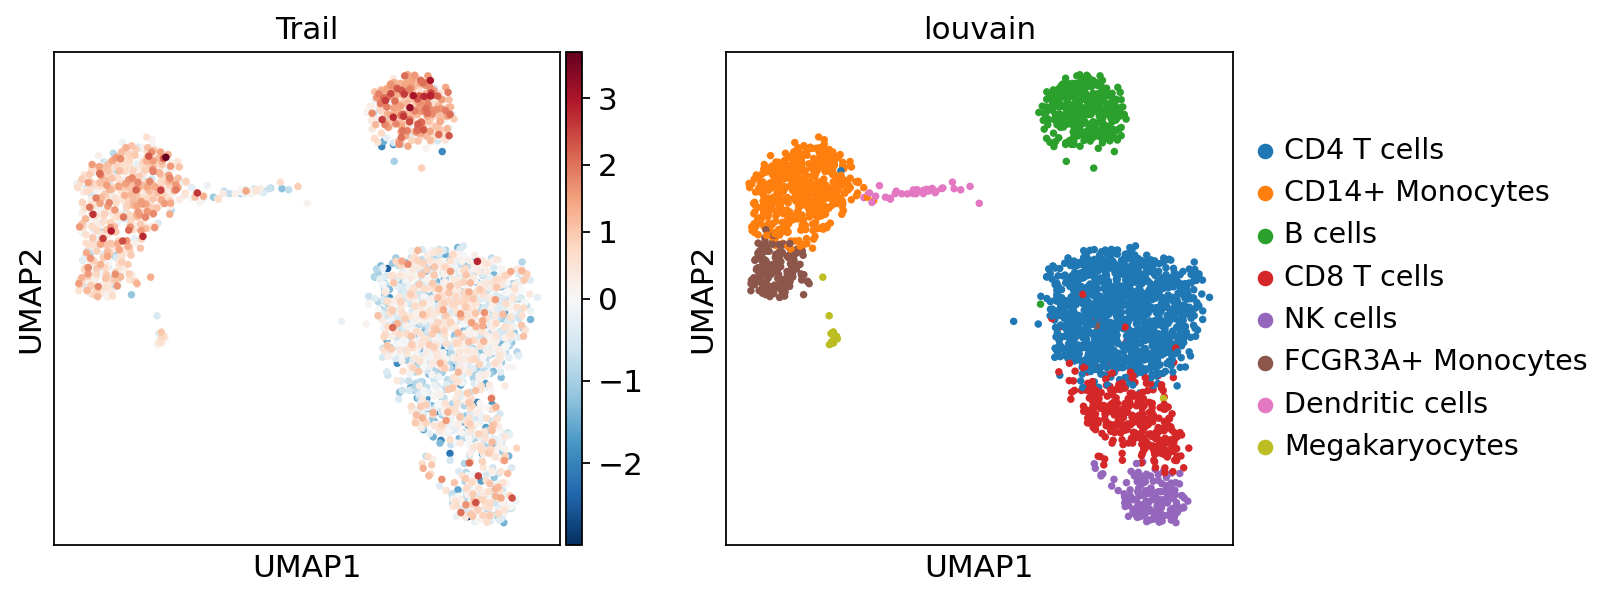

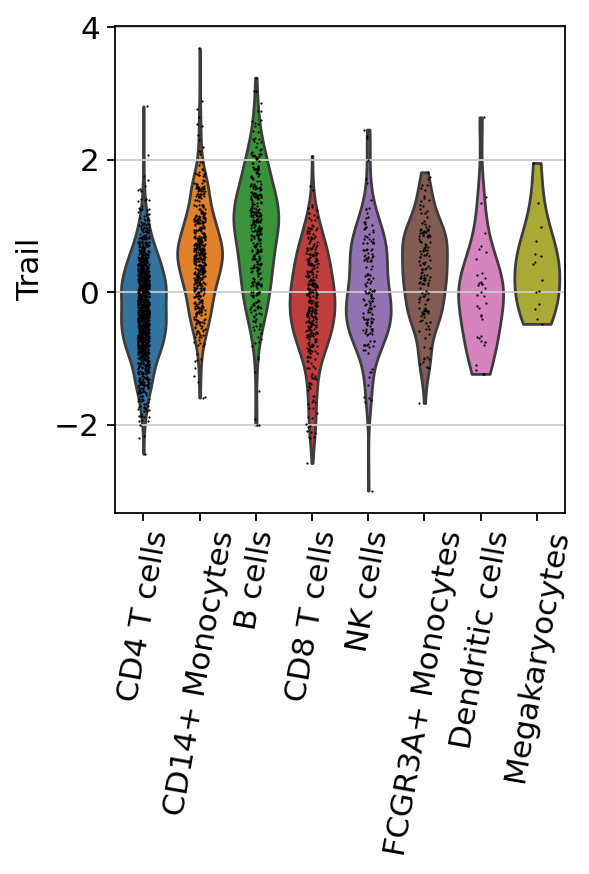

In [12]:
sc.pl.umap(acts, color=['Trail', 'louvain'], cmap='RdBu_r', vcenter=0)
sc.pl.violin(acts, keys=['Trail'], groupby='louvain', rotation=80)

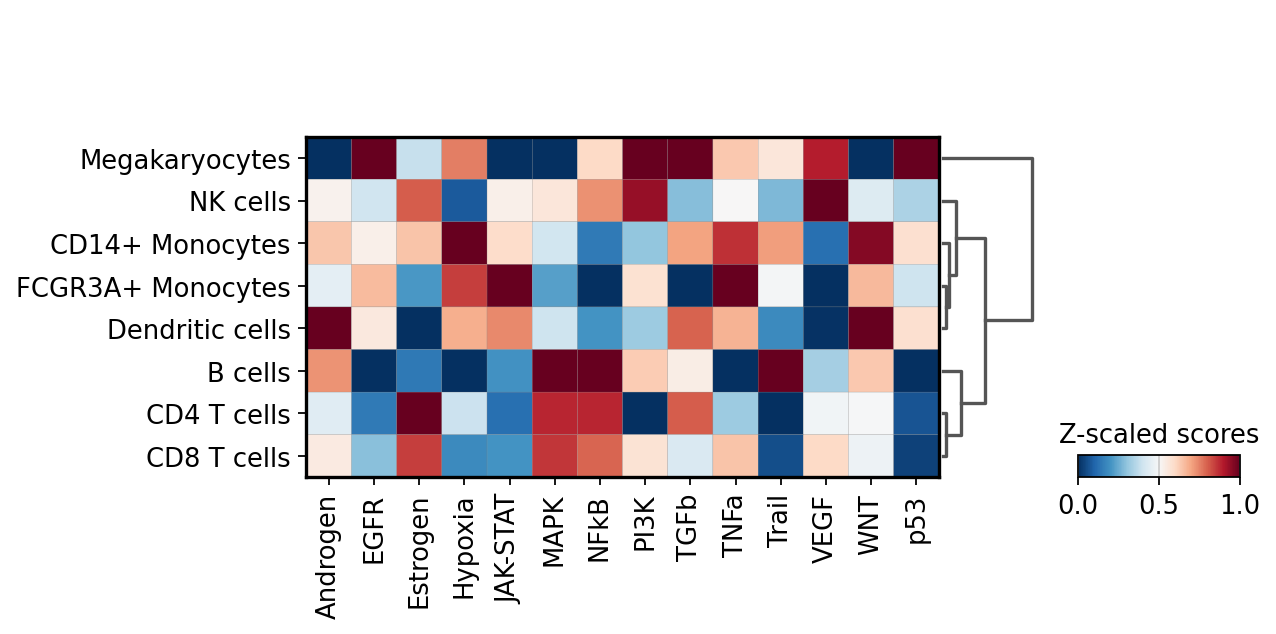

In [13]:
sc.pl.matrixplot(acts, var_names=acts.var_names, groupby='louvain', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r')

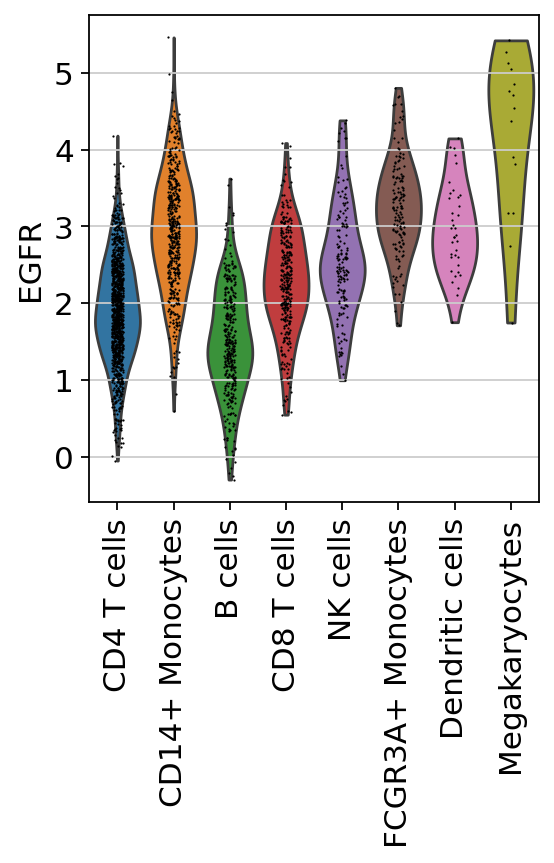

In [14]:
sc.pl.violin(acts, keys=['EGFR'], groupby='louvain', rotation=90)

In [15]:
net = dc.get_collectri(organism='human', split_complexes=False)
net

source  target  weight
0       ABL1     BAX       1
1       ABL1    BCL2      -1
2       ABL1    BCL6      -1
3       ABL1   CCND2       1
4       ABL1  CDKN1A       1
...      ...     ...     ...
40625   ZXDC  CDKN1C       1
40626   ZXDC  CDKN2A       1
40627   ZXDC   CIITA       1
40628   ZXDC   HLA-E       1
40629   ZXDC     IL5       1

[40630 rows x 3 columns]

In [16]:
dc.run_ulm(
    mat=adata,
    net=net,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)

1 features of mat are empty, they will be removed.
Running ulm on mat with 2638 samples and 13713 targets for 582 sources.


  0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'dendrogram_louvain'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr', 'mlm_estimate', 'mlm_pvals', 'ulm_estimate', 'ulm_pvals'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [18]:
adata.obsm['ulm_estimate']

ABL1       AHR      AIRE       AP1     APEX1        AR  \
AAACATACAACCAC-1  3.105468  0.902811  3.086978  2.558430  0.876697  2.255649   
AAACATTGAGCTAC-1  0.644366 -0.890864  1.112358  3.596856  1.016453  1.649951   
AAACATTGATCAGC-1  2.105423  2.446147  2.693688  5.117994  2.214491  3.830123   
AAACCGTGCTTCCG-1  0.276449 -0.028714  3.917666  4.716057  2.253958  4.214366   
AAACCGTGTATGCG-1  2.003766 -0.050887  3.036960  5.342700  2.259177  1.854994   
...                    ...       ...       ...       ...       ...       ...   
TTTCGAACTCTCAT-1  2.286176  1.804704  4.021525  6.444203  1.351661  4.544536   
TTTCTACTGAGGCA-1  2.274223  0.730349  1.339755  2.823149  0.879407  3.195549   
TTTCTACTTCCTCG-1  2.906737  1.561718  3.150110  2.882659  0.815308  1.361353   
TTTGCATGAGAGGC-1 -0.308224  0.814926  2.975057  3.942976  3.423315  0.986302   
TTTGCATGCCTCAC-1  1.273584  0.938888  2.294745  3.370554  0.707534  1.625602   

                    ARID1A    ARID1B    ARID3A    ARID3B  ...    ZNF362  \
AAACATACAACCAC-1  0.622126 -0.454210 -0.497625 -0.454210  ...  0.051971   
AAACATTGAGCTAC-1 -0.594850 -0.594846 -0.651707 -0.594846  ... -0.334577   
AAACATTGATCAGC-1 -0.566923 -0.566920 -0.621111  0.393613  ... -0.841065   
AAACCGTGCTTCCG-1 -0.523785 -0.523782 -0.573849 -0.523782  ...  2.882439   
AAACCGTGTATGCG-1 -0.393699  1.259139 -0.431328 -0.393696  ...  1.182479   
...                    ...       ...       ...       ...  ...       ...   
TTTCGAACTCTCAT-1  0.336520 -0.569478  0.203251  0.336517  ...  1.184737   
TTTCTACTGAGGCA-1  0.318464 -0.589052  0.183192  0.318462  ...  0.350057   
TTTCTACTTCCTCG-1 -0.415441 -0.415438 -0.455148 -0.415438  ... -0.616328   
TTTGCATGAGAGGC-1 -0.363216 -0.363214 -0.397933 -0.363214  ...  0.543858   
TTTGCATGCCTCAC-1 -0.442853 -0.442850 -0.485181 -0.442851  ...  0.129365   

                    ZNF382    ZNF384    ZNF395    ZNF436    ZNF699     ZNF76  \
AAACATACAACCAC-1 -3.070563 -0.287258 -0.454215  0.485033 -1.168096  0.816618   
AAACATTGAGCTAC-1  0.798243  0.266119  0.217655 -0.651680 -0.263380  1.700058   
AAACATTGATCAGC-1 -5.552268  0.400809  0.393616 -0.621085 -0.214623 -0.206984   
AAACCGTGCTTCCG-1 -0.057151 -0.331258 -0.523787  0.356897  0.639149  0.739304   
AAACCGTGTATGCG-1  0.528313  1.057652  2.912767 -0.431311  2.207848 -0.143739   
...                    ...       ...       ...       ...       ...       ...   
TTTCGAACTCTCAT-1 -2.550669 -0.360157 -0.569485 -0.623888  0.154066 -0.207923   
TTTCTACTGAGGCA-1 -1.457127 -0.372536 -0.589059 -0.645333 -0.807615 -0.215069   
TTTCTACTTCCTCG-1 -2.878389 -0.262737 -0.415442 -0.455130 -0.583191 -0.151677   
TTTGCATGAGAGGC-1  0.487406 -0.229710 -0.363218 -0.397917 -0.308455 -0.132609   
TTTGCATGCCTCAC-1 -2.014070 -0.280075 -0.442855  0.579456 -0.684481 -0.161685   

                   ZNF804A     ZNF91      ZXDC  
AAACATACAACCAC-1 -0.090827  1.496588  2.328766  
AAACATTGAGCTAC-1 -0.118951  2.089825  0.693020  
AAACATTGATCAGC-1  1.408917  1.648628  0.393655  
AAACCGTGCTTCCG-1 -0.104740  3.708728  2.535483  
AAACCGTGTATGCG-1 -0.078726  2.713175 -0.393741  
...                    ...       ...       ...  
TTTCGAACTCTCAT-1  0.792007  3.299084  1.534470  
TTTCTACTGAGGCA-1  0.789607  2.952728  1.226170  
TTTCTACTTCCTCG-1 -0.083074  1.635638 -0.415485  
TTTGCATGAGAGGC-1 -0.072632  3.547983  1.242570  
TTTGCATGCCTCAC-1 -1.254577  1.927536  1.889836  

[2638 rows x 582 columns]

In [19]:
adata.obsm['collectri_ulm_estimate'] = adata.obsm['ulm_estimate'].copy()
adata.obsm['collectri_ulm_pvals'] = adata.obsm['ulm_pvals'].copy()
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'dendrogram_louvain'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr', 'mlm_estimate', 'mlm_pvals', 'ulm_estimate', 'ulm_pvals', 'collectri_ulm_estimate', 'collectri_ulm_pvals'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [20]:
acts = dc.get_acts(adata, obsm_key='ulm_estimate')
acts

AnnData object with n_obs × n_vars = 2638 × 582
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'dendrogram_louvain'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr', 'mlm_estimate', 'mlm_pvals', 'ulm_estimate', 'ulm_pvals', 'collectri_ulm_estimate', 'collectri_ulm_pvals'

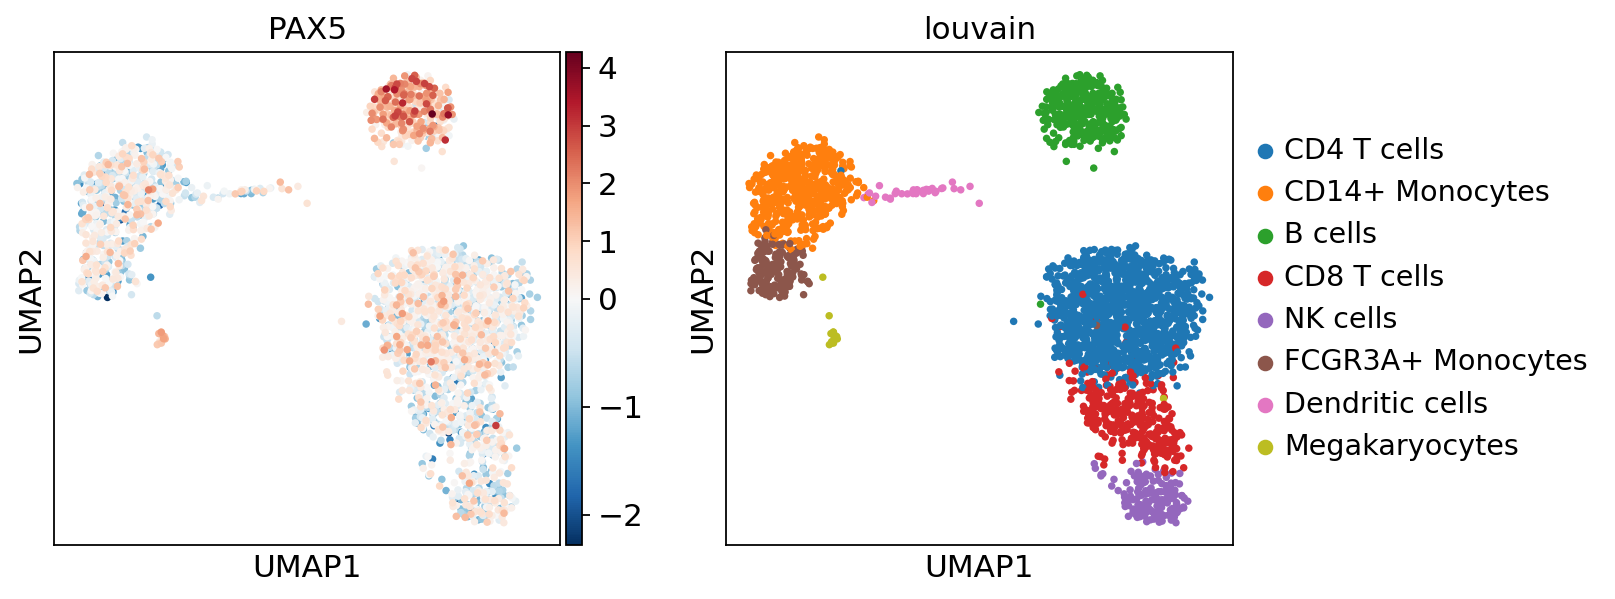

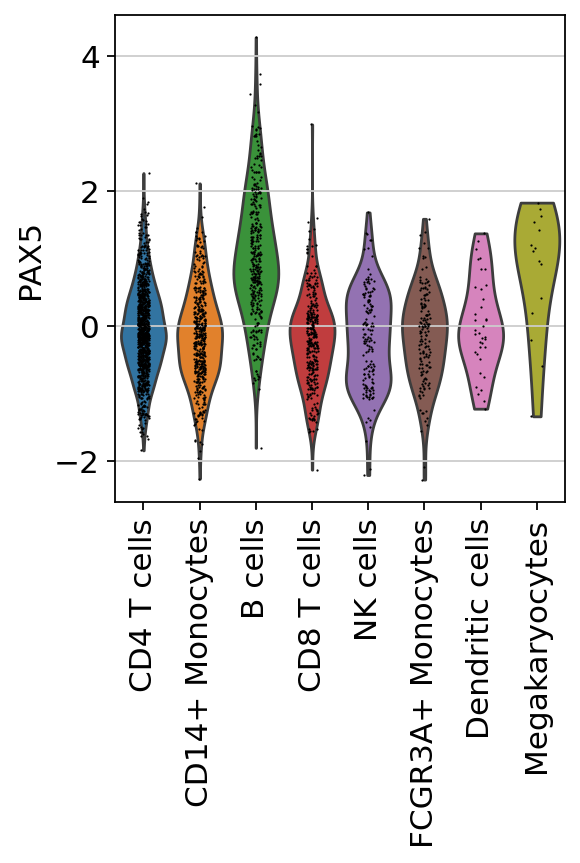

In [22]:
sc.pl.umap(acts, color=['PAX5', 'louvain'], cmap='RdBu_r', vcenter=0)
sc.pl.violin(acts, keys=['PAX5'], groupby='louvain', rotation=90)

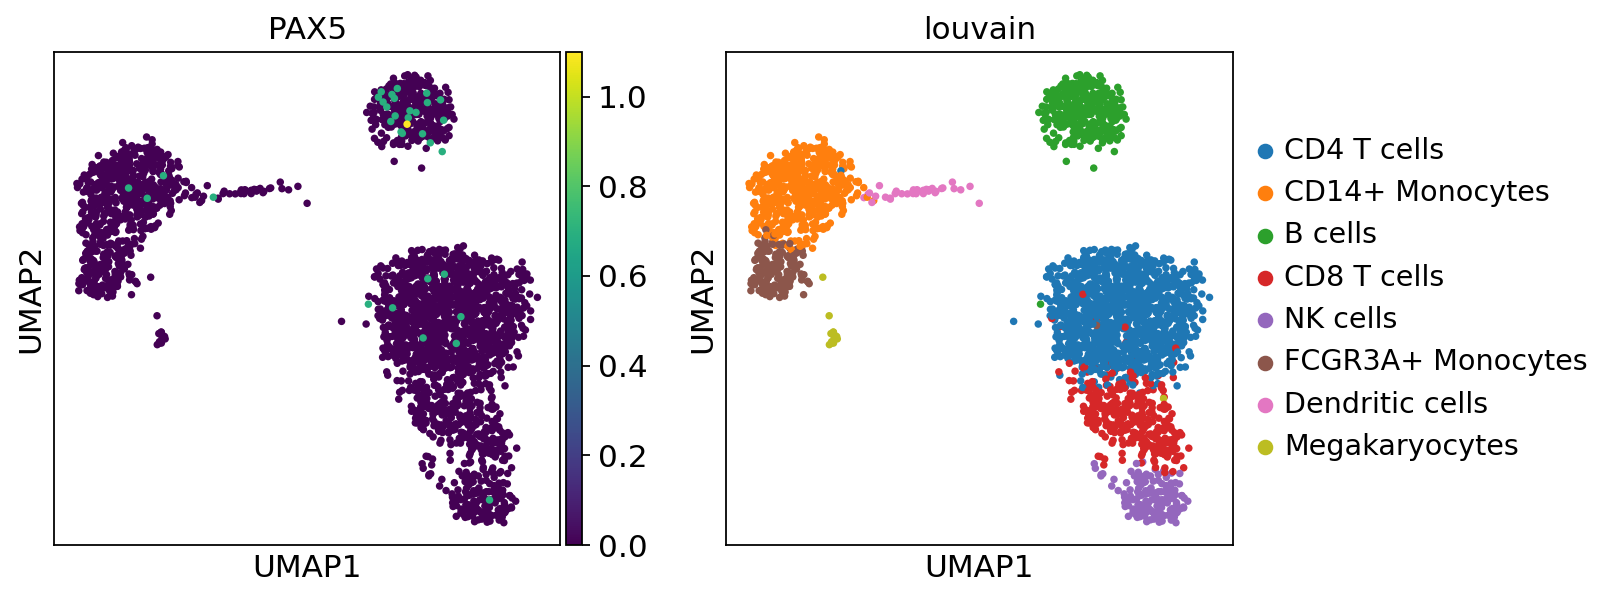

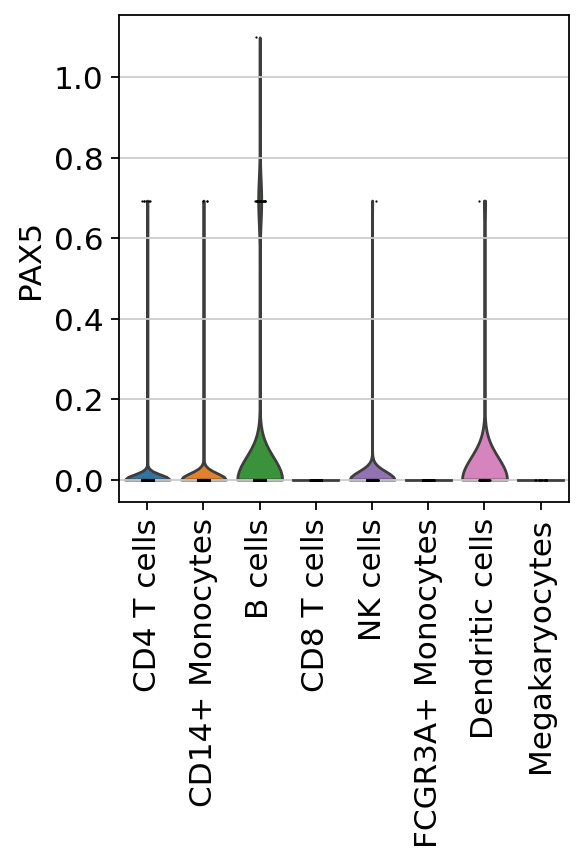

In [23]:
sc.pl.umap(adata, color=['PAX5', 'louvain'])
sc.pl.violin(adata, keys=['PAX5'], groupby='louvain', rotation=90)

In [24]:
df = dc.rank_sources_groups(acts, groupby='louvain', reference='rest', method='t-test_overestim_var')
df

group reference    names  statistic  meanchange         pvals  \
0      B cells      rest     EBF1  45.939610    2.637922  0.000000e+00   
1      B cells      rest   RFXANK  41.651199   10.032308  0.000000e+00   
2      B cells      rest    RFXAP  41.465607   10.624727  0.000000e+00   
3      B cells      rest     RFX5  41.428032    9.044719  0.000000e+00   
4      B cells      rest    CIITA  38.505505    6.445219  0.000000e+00   
...        ...       ...      ...        ...         ...           ...   
4651  NK cells      rest  TGFB1I1 -11.145443   -1.964605  2.710607e-24   
4652  NK cells      rest    HMGA2 -11.360269   -1.685328  5.055646e-25   
4653  NK cells      rest      MYC -11.378159   -2.248613  6.102523e-25   
4654  NK cells      rest     TCF4 -11.821822   -1.300580  8.805007e-27   
4655  NK cells      rest     THRA -11.872765   -1.215560  1.398845e-26   

         pvals_adj  
0     0.000000e+00  
1     0.000000e+00  
2     0.000000e+00  
3     0.000000e+00  
4     0.000000e+00  
...            ...  
4651  7.512254e-23  
4652  1.634659e-23  
4653  1.869299e-23  
4654  3.416343e-25  
4655  5.088299e-25  

[4656 rows x 7 columns]

from matplotlib import pyplot as plt
df['statistic'].plot(kind='hist', bins=20, title='statistic')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['meanchange'].plot(kind='hist', bins=20, title='meanchange')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['pvals'].plot(kind='hist', bins=20, title='pvals')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['pvals_adj'].plot(kind='hist', bins=20, title='pvals_adj')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='statistic', y='meanchange', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='meanchange', y='pvals', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='pvals', y='pvals_adj', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['statistic'].plot(kind='line', figsize=(8, 4), title='statistic')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['meanchange'].plot(kind='line', figsize=(8, 4), title='meanchange')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['pvals'].plot(kind='line', figsize=(8, 4), title='pvals')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['pvals_adj'].plot(kind='line', figsize=(8, 4), title='pvals_adj')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='statistic', y='group', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='meanchange', y='group', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='pvals', y='group', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='pvals_adj', y='group', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [25]:
n_markers = 3
source_markers = df.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
source_markers

{'B cells': ['EBF1', 'RFXANK', 'RFXAP'],
 'CD14+ Monocytes': ['ONECUT1', 'EHF', 'ELF3'],
 'CD4 T cells': ['ZBTB4', 'MYC', 'ZBED1'],
 'CD8 T cells': ['KLF13', 'IRF5', 'TEAD1'],
 'Dendritic cells': ['RFXAP', 'RFXANK', 'RFX5'],
 'FCGR3A+ Monocytes': ['SIN3A', 'PPARD', 'SPIC'],
 'Megakaryocytes': ['PKNOX1', 'PBX2', 'FLI1'],
 'NK cells': ['ZGLP1', 'CEBPZ', 'ZNF395']}

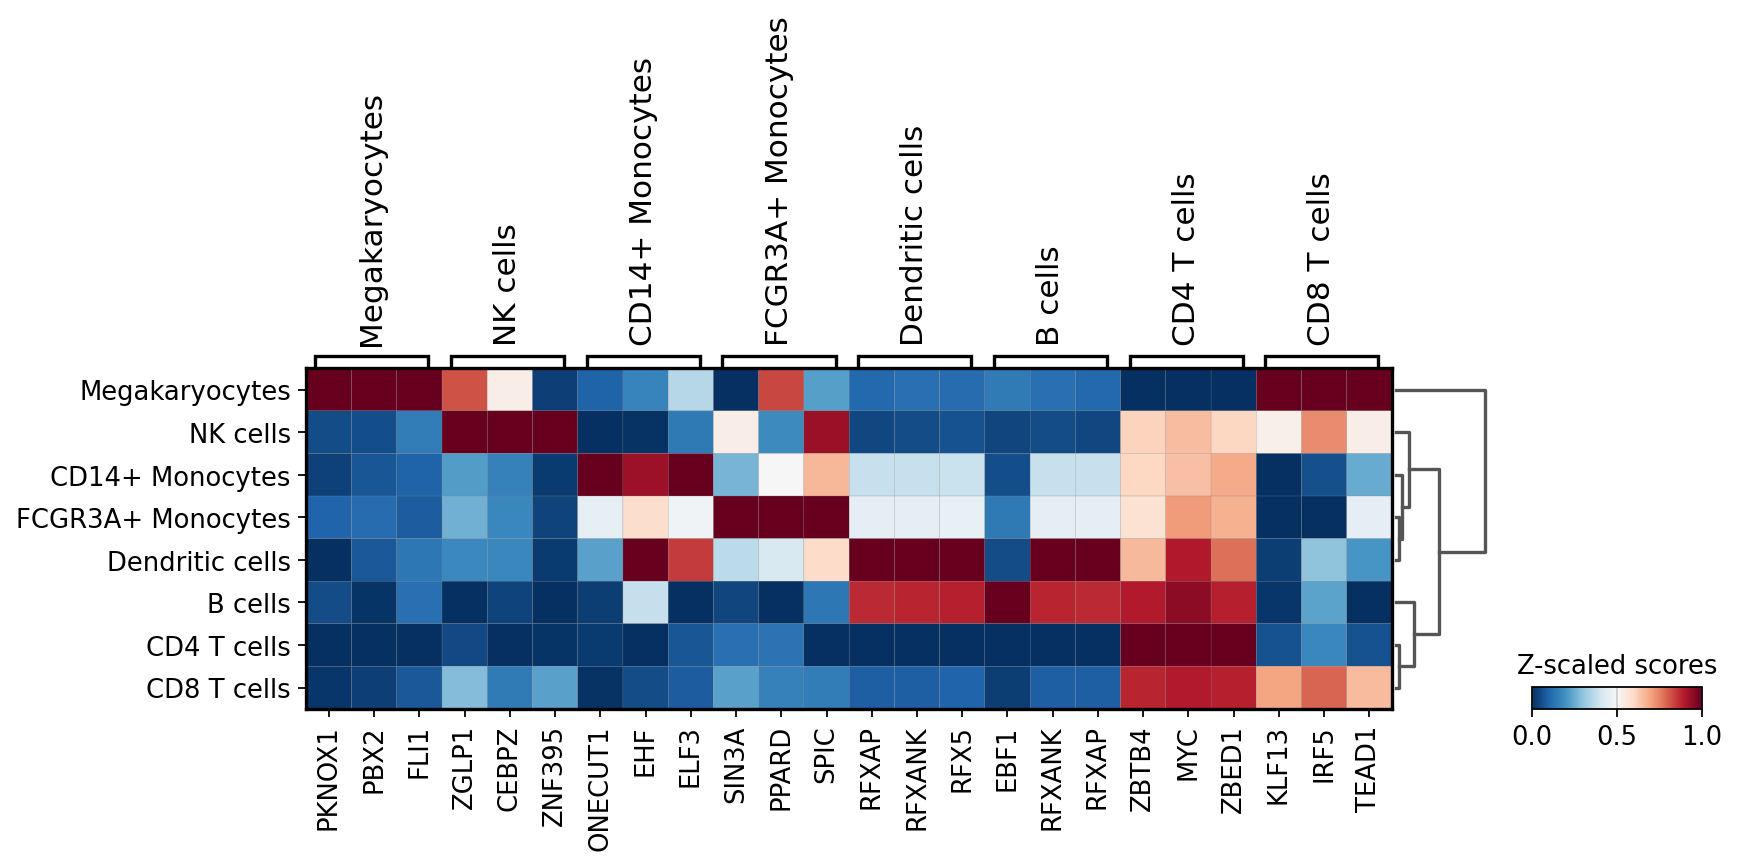

In [26]:
sc.pl.matrixplot(acts, source_markers, 'louvain', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r')

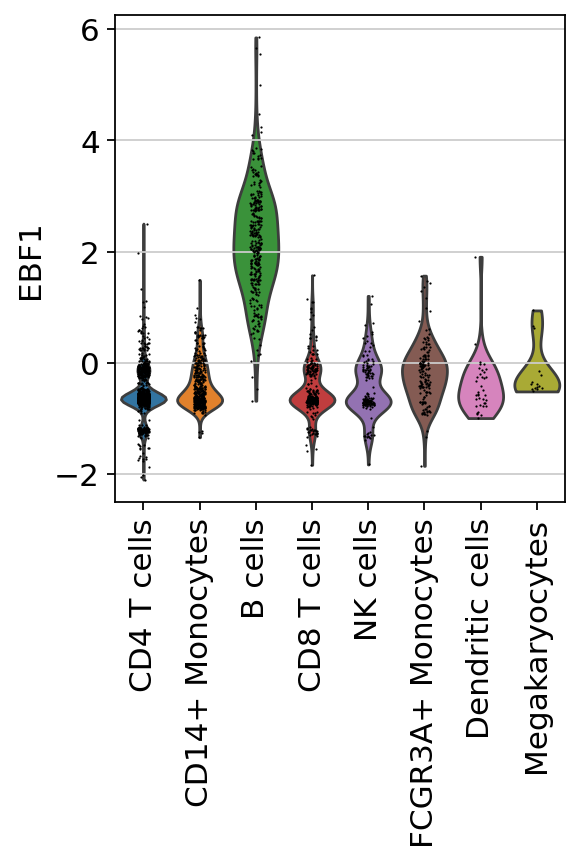

In [27]:
sc.pl.violin(acts, keys=['EBF1'], groupby='louvain', rotation=90)

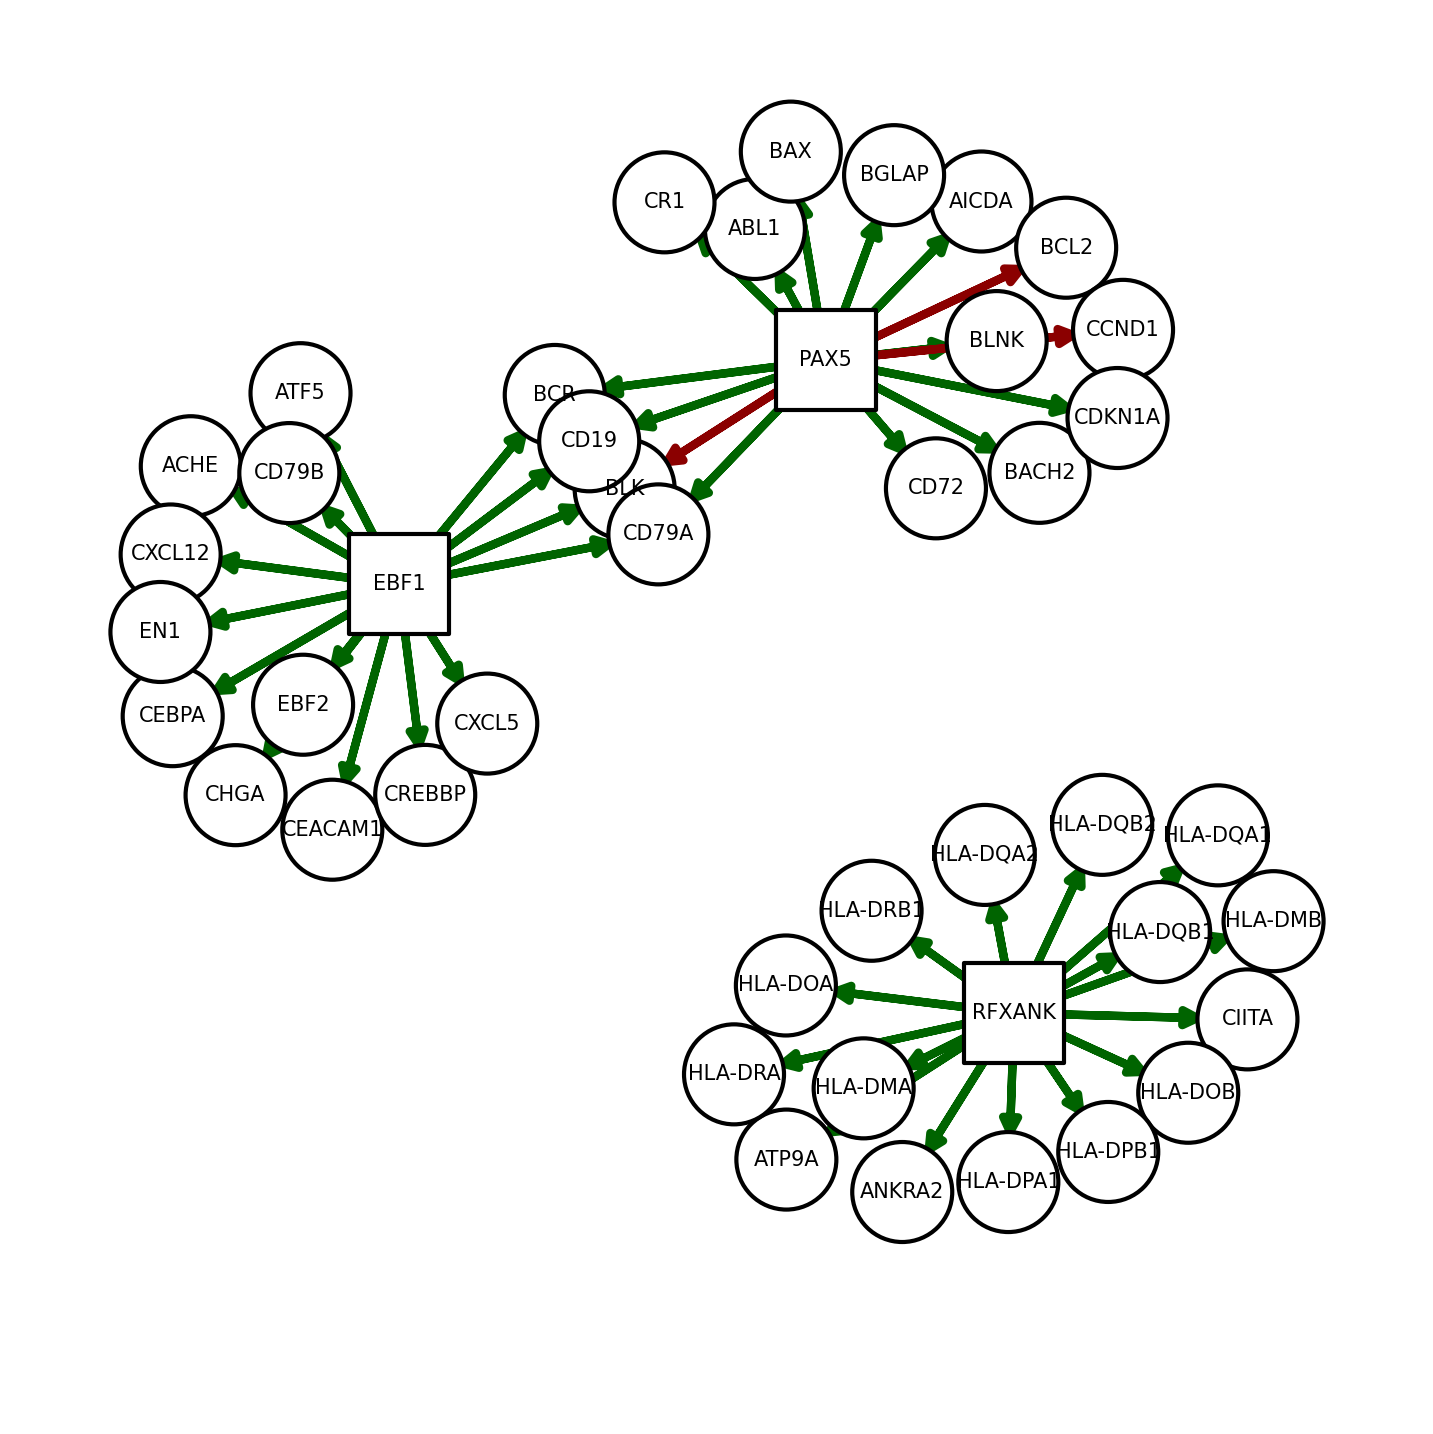

In [28]:
dc.plot_network(
    net=net,
    n_sources=['PAX5', 'EBF1', 'RFXANK'],
    n_targets=15,
    node_size=100,
    s_cmap='white',
    t_cmap='white',
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    figsize=(5, 5)
)

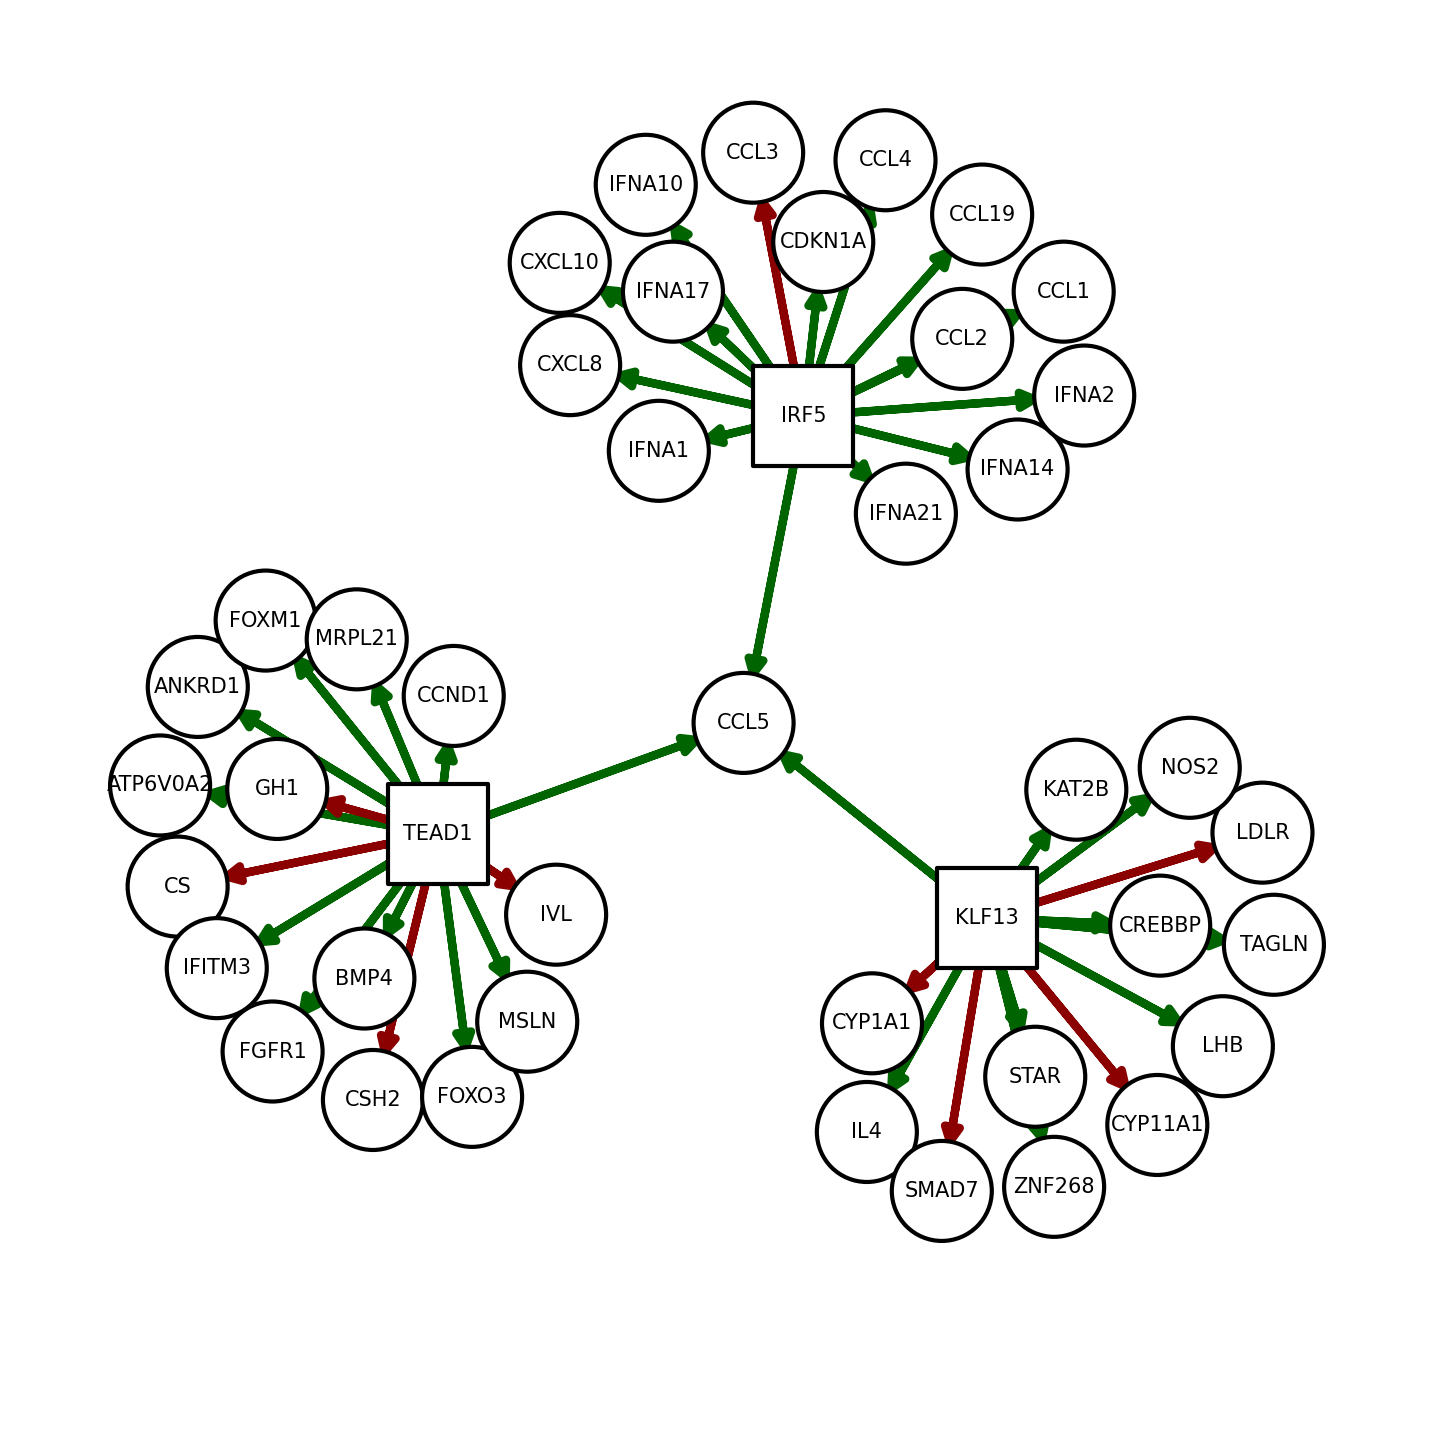

In [30]:
dc.plot_network(
    net=net,
    n_sources=['KLF13', 'IRF5', 'TEAD1'],
    n_targets=15,
    node_size=100,
    s_cmap='white',
    t_cmap='white',
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    figsize=(5, 5)
)